i =  0 , X =  (50, 150) , y =  (50,) , set_ =  Training , class_ =  1
i =  1 , X =  (50, 150) , y =  (50,) , set_ =  Training , class_ =  2
i =  2 , X =  (150, 150) , y =  (150,) , set_ =  Test , class_ =  1
i =  3 , X =  (150, 150) , y =  (150,) , set_ =  Test , class_ =  2


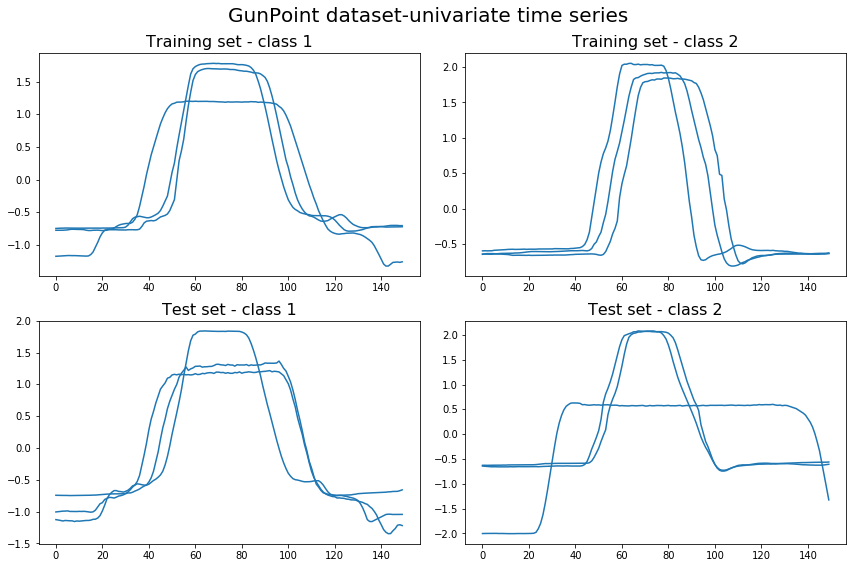

In [20]:
import matplotlib.pyplot as plt
from pyts.datasets import load_gunpoint

"""
explain: http://www.timeseriesclassification.com/description.php?Dataset=GunPoint
source: https://pyts.readthedocs.io/en/stable/auto_examples/datasets/plot_load_gunpoint.html
"""

X_train, X_test, y_train, y_test = load_gunpoint(return_X_y=True)
n_samples_per_plot = 3

plt.figure(figsize=(12, 8))

"""
enumerate() 函数用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标，一般用在 for 循环当中。
zip() 函数用于将可迭代的对象作为参数，将对象中对应的元素打包成一个个元组，然后返回由这些元组组成的对象，这样做的好处是节约了不少的内存。
"""

"""
对于GunPoint数据集，每一个特征包含150个连读的时间点，训练集包含50个特征，测试集包含150个特征，最终结果分为两类：拔枪的姿势和抬枪射击的姿势

拔枪：他们从一个安装在臀部的枪套里抽出一把仿制枪，对准一个目标大约一秒钟，然后把枪放回枪套，双手放在身体两侧。
抬枪射击：他们用他们的食指指向一个目标大约一秒钟，然后他们的手放回到他们的两侧。

对于这两类动作数据，Gunpoint数据集跟踪了实验人员右手在X轴和y轴上的质心，它们似乎高度相关。归档中的数据就是x轴。

Training samples： 50
Test samples： 150
Timestamps： 150
Classes： 2
"""

for i, (X, y, set_, class_,) in enumerate(zip(
    [X_train, X_train, X_test, X_test],
    [y_train, y_train, y_test, y_test],
    ['Training', 'Training', 'Test', 'Test'],
    [1, 2, 1, 2]
)):
    print("i = ",i , ", X = ", X.shape, ", y = ", y.shape, ", set_ = ", set_, ", class_ = ", class_)
    plt.subplot(2, 2, i + 1)
    for j in range(n_samples_per_plot):
        plt.plot(X[y == class_][j], 'C0')
        d = y == class_
        a1 = X[d]
    plt.title('{} set - class {}'.format(set_, class_), fontsize=16)

plt.suptitle('GunPoint dataset-univariate time series', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.9, hspace=0.2)
plt.show()

(40, 6, 100) (40, 6, 100) (40,) (40,)
[b'Standing' b'Standing' b'Standing' b'Standing' b'Standing' b'Standing'
 b'Standing' b'Standing' b'Standing' b'Standing' b'Running' b'Running'
 b'Running' b'Running' b'Running' b'Running' b'Running' b'Running'
 b'Running' b'Running' b'Walking' b'Walking' b'Walking' b'Walking'
 b'Walking' b'Walking' b'Walking' b'Walking' b'Walking' b'Walking'
 b'Badminton' b'Badminton' b'Badminton' b'Badminton' b'Badminton'
 b'Badminton' b'Badminton' b'Badminton' b'Badminton' b'Badminton']


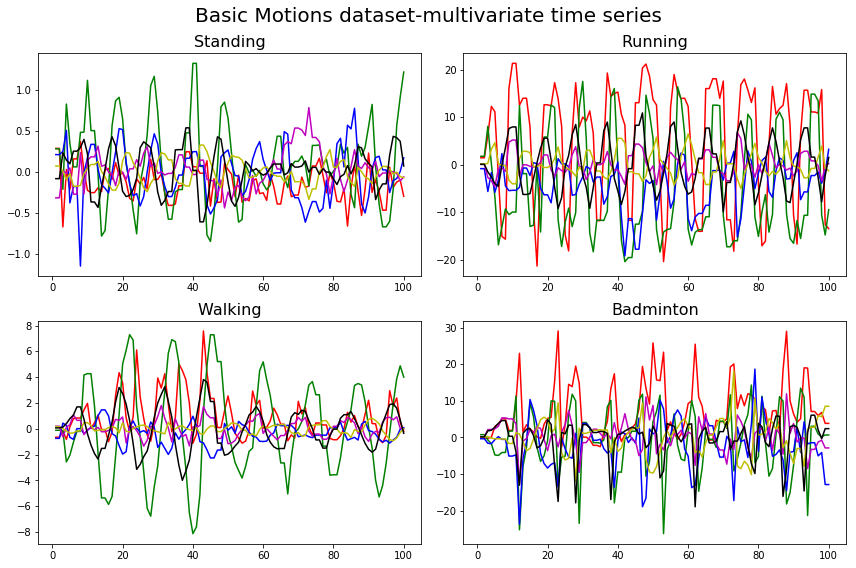

In [21]:
from pyts.classification import BOSSVS
from pyts.datasets import load_basic_motions
from pyts.multivariate.classification import MultivariateClassifier
### https://pyts.readthedocs.io/en/stable/user_guide.html，业余时间学习一下该代码库中的相关方法和理论

"""
http://www.timeseriesclassification.com/description.php?Dataset=BasicMotions

人体动作识别，行走，奔跑，站立，打羽毛球四类。多变量，共有6个不同单一变量

这些数据是一个学生项目的一部分，在这个项目中，四名学生戴着智能手表进行四项活动。
手表内置3D加速计和3D陀螺仪，分为散步、休息、跑步和羽毛球四类。参与者被要求总共记录5次动作，
数据每十分之一秒采样一次，持续10秒。

Training samples：40
Test samples：40
Dimensionality：6
Timestamps：100
Classes：4
"""
X_train1, X_test1, y_train1, y_test1 = load_basic_motions(return_X_y=True)
print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)
print(y_train1)

j = 3
title_pic = ["Standing", "Running", "Walking", "Badminton"]
plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    d1 = X_train1[j][0]
    d2 = X_train1[j][1]
    d3 = X_train1[j][2]
    d4 = X_train1[j][3]
    d5 = X_train1[j][4]
    d6 = X_train1[j][5]
    z1 = [i for i in range(1, 101)]
    plt.plot(z1, d1, color="r")
    plt.plot(z1, d2, color="g")
    plt.plot(z1, d3, color="b")
    plt.plot(z1, d4, color="m")
    plt.plot(z1, d5, color="y")
    plt.plot(z1, d6, color="k")
    plt.title(title_pic[i], fontsize=16)
    j = j + 10

plt.suptitle('Basic Motions dataset-multivariate time series', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.9, hspace=0.2)
plt.show()

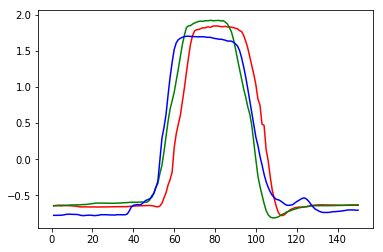

In [3]:
a1 = X_train[0]
a2 = X_train[1]
a3 = X_train[2]

x1 = [i for i in range(1,151)]
plt.plot(x1, a1, color="r") 
plt.plot(x1, a2, color="g")
plt.plot(x1, a3, color="b")
# plt.plot(x1, a2, color="b", linestyle="-", marker="s", linewidth=1)
plt.show() 

In [4]:
from pyts.datasets import ucr_dataset_list
"""
UCR 单变量时间序列数据集
"""
print(len(ucr_dataset_list()))
print(ucr_dataset_list())

128
['ACSF1', 'Adiac', 'AllGestureWiimoteX', 'AllGestureWiimoteY', 'AllGestureWiimoteZ', 'ArrowHead', 'BME', 'Beef', 'BeetleFly', 'BirdChicken', 'CBF', 'Car', 'Chinatown', 'ChlorineConcentration', 'CinCECGtorso', 'Coffee', 'Computers', 'CricketX', 'CricketY', 'CricketZ', 'Crop', 'DiatomSizeReduction', 'DistalPhalanxOutlineAgeGroup', 'DistalPhalanxOutlineCorrect', 'DistalPhalanxTW', 'DodgerLoopDay', 'DodgerLoopGame', 'DodgerLoopWeekend', 'ECG200', 'ECG5000', 'ECGFiveDays', 'EOGHorizontalSignal', 'EOGVerticalSignal', 'Earthquakes', 'ElectricDevices', 'EthanolLevel', 'FaceAll', 'FaceFour', 'FacesUCR', 'FiftyWords', 'Fish', 'FordA', 'FordB', 'FreezerRegularTrain', 'FreezerSmallTrain', 'Fungi', 'GestureMidAirD1', 'GestureMidAirD2', 'GestureMidAirD3', 'GesturePebbleZ1', 'GesturePebbleZ2', 'GunPoint', 'GunPointAgeSpan', 'GunPointMaleVersusFemale', 'GunPointOldVersusYoung', 'Ham', 'HandOutlines', 'Haptics', 'Herring', 'HouseTwenty', 'InlineSkate', 'InsectEPGRegularTrain', 'InsectEPGSmallTrain'

In [5]:
from pyts.datasets import uea_dataset_list
"""
UEA 多变量时间序列数据集
"""
print(len(uea_dataset_list()))
print(uea_dataset_list())

30
['ArticularyWordRecognition', 'AtrialFibrillation', 'BasicMotions', 'CharacterTrajectories', 'Cricket', 'DuckDuckGeese', 'EigenWorms', 'Epilepsy', 'Ering', 'EthanolConcentration', 'FaceDetection', 'FingerMovements', 'HandMovementDirection', 'Handwriting', 'Heartbeat', 'InsectWingbeat', 'JapaneseVowels', 'LSST', 'Libras', 'MotorImagery', 'NATOPS', 'PEMS-SF', 'PenDigits', 'Phoneme', 'RacketSports', 'SelfRegulationSCP1', 'SelfRegulationSCP2', 'SpokenArabicDigits', 'StandWalkJump', 'UWaveGestureLibrary']


In [6]:
from pyts import datasets
"""
https://pyts.readthedocs.io/en/stable/modules/multivariate.html
"""
print(datasets.ucr_dataset_info("GunPoint"))  ## 人体动作数据集,拔枪和持枪射击两类。单变量
print(datasets.ucr_dataset_info("Meat"))    ## 食物光谱数据集，鸡肉、猪肉和火鸡肉三类。单变量
print(datasets.uea_dataset_info("BasicMotions"))  ### 人体动作识别，行走，奔跑，站立，羽毛球四类。多变量，共有6个不同单一变量

{'n_classes': 2, 'n_timestamps': '150', 'test_size': 150, 'train_size': 50, 'type': 'MOTION'}
{'n_classes': 3, 'n_timestamps': '448', 'test_size': 60, 'train_size': 60, 'type': 'SPECTRO'}
{'train_size': 40, 'test_size': 40, 'n_timestamps': 100, 'n_classes': 4, 'type': 'HAR'}


In [7]:
# from pyts.datasets import  fetch_ucr_dataset
# """
# 下载UCR上的单变量时间序列数据集
# """
# fetch_ucr_dataset(dataset="Meat", data_home = "/home/hm/jupyter/liuzhen/Time-Series/")

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=1)
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
print(clf.predict_proba(X_test[:1]))

print(clf.predict(X_test[:5, :]))

print(clf.score(X_test, y_test))

[[0.03838405 0.96161595]]
[1 0 1 0 1]
0.88


In [9]:
# import numpy as np
# from pyts.classification import LearningShapelets
# from pyts.datasets import load_gunpoint
# from pyts.utils import windowed_view

# # Load the data set and fit the classifier
# X, _, y, _ = load_gunpoint(return_X_y=True)
# clf = LearningShapelets(random_state=42, tol=0.01)
# clf.fit(X, y)

# # Select two shapelets
# shapelets = np.asarray([clf.shapelets_[0, -9], clf.shapelets_[0, -12]])

# # Derive the distances between the time series and the shapelets
# shapelet_size = shapelets.shape[1]
# X_window = windowed_view(X, window_size=shapelet_size, window_step=1)
# X_dist = np.mean(
#     (X_window[:, :, None] - shapelets[None, :]) ** 2, axis=3).min(axis=1)

# plt.figure(figsize=(14, 4))

# # Plot the two shapelets
# plt.subplot(1, 2, 1)
# plt.plot(shapelets[0])
# plt.plot(shapelets[1])
# plt.title('Two learned shapelets', fontsize=14)

# # Plot the distances
# plt.subplot(1, 2, 2)
# for color, label in zip('br', (1, 2)):
#     plt.scatter(X_dist[y == label, 0], X_dist[y == label, 1],
#                 c=color, label='Class {}'.format(label))
# plt.title('Distances between the time series and both shapelets',
#           fontsize=14)
# plt.legend()
# plt.show()

In [10]:
from pyts.classification import BOSSVS
from pyts.datasets import load_basic_motions
from pyts.multivariate.classification import MultivariateClassifier

"""
http://www.timeseriesclassification.com/description.php?Dataset=BasicMotions%3E
"""
X_train, X_test, y_train, y_test = load_basic_motions(return_X_y=True)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(X_train[:2])
print(y_train)
clf = MultivariateClassifier(BOSSVS())
clf.fit(X_train, y_train)
# MultivariateClassifier(...)
print(clf.score(X_test, y_test))

(40, 6, 100) (40,) (40, 6, 100) (40,)
[[[ 7.910600e-02  7.910600e-02 -9.034970e-01 ... -1.932710e-01
   -1.932710e-01 -2.051500e-01]
  [ 3.940320e-01  3.940320e-01 -3.666397e+00 ...  5.522700e-02
    5.522700e-02 -3.390000e-03]
  [ 5.514440e-01  5.514440e-01 -2.828440e-01 ... -4.153000e-02
   -4.153000e-02 -1.511300e-02]
  [ 3.515650e-01  3.515650e-01 -9.588100e-02 ...  0.000000e+00
    0.000000e+00 -7.990000e-03]
  [ 2.397000e-02  2.397000e-02 -3.196050e-01 ... -1.331700e-02
   -1.331700e-02 -1.065300e-02]
  [ 6.338830e-01  6.338830e-01  9.721310e-01 ... -6.392100e-02
   -6.392100e-02 -3.196000e-02]]

 [[ 3.777510e-01  3.777510e-01  2.952965e+00 ... -3.233830e-01
   -3.336250e-01 -3.336250e-01]
  [-6.108500e-01 -6.108500e-01  9.707170e-01 ... -9.859300e-02
   -2.159870e-01 -2.159870e-01]
  [-1.473760e-01 -1.473760e-01 -5.962515e+00 ...  6.305100e-02
   -8.480000e-04 -8.480000e-04]
  [-1.038720e-01 -1.038720e-01 -7.593275e+00 ... -1.864400e-02
   -7.990000e-03 -7.990000e-03]
  [-1.0919

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# X, y = make_classification(n_samples=100, random_state=1)
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, stratify=y, random_state=1)

X_train, X_test, y_train, y_test = load_gunpoint(return_X_y=True)

# X_train, X_test, y_train, y_test = load_basic_motions(return_X_y=True)
print(y_test)

clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
print(clf.predict_proba(X_test[:1]))

print(clf.predict(X_test[:5, :]))

print(clf.score(X_test, y_test))

# X_train, X_test, y_train, y_test = load_gunpoint(return_X_y=True)

[1 2 2 1 1 2 1 2 2 1 1 1 2 1 1 1 1 2 2 2 1 2 1 1 1 2 1 1 2 1 1 2 2 1 1 1 1
 1 1 2 1 2 1 1 2 1 2 2 1 2 2 2 1 2 1 1 2 2 1 2 1 2 1 1 2 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 1 1 1 2 2 2 2 1 2 1 1 1 2 1 2 1 1 2 2 1 1 2 1 1 2 2 1 1 2 1 2 2
 2 1 2 1 1 2 1 1 2 1 2 2 2 1 2 1 1 2 2 2 2 1 1 1 2 1 2 1 1 2 1 1 2 1 2 1 2
 2 1]
[[9.99096548e-01 9.03452221e-04]]
[1 2 2 1 1]
0.9533333333333334


/home/hm/anaconda3/envs/liuzhen/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [12]:
from pyts.classification import KNeighborsClassifier
from pyts.datasets import load_gunpoint
X_train, X_test, y_train, y_test = load_gunpoint(return_X_y=True)
clf = KNeighborsClassifier(metric='dtw')
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.9066666666666666


In [13]:
# from pyts.classification import LearningShapelets
# from pyts.datasets import load_gunpoint
# X_train, X_test, y_train, y_test = load_gunpoint(return_X_y=True)
# clf = LearningShapelets(random_state=42, tol=0.01)
# clf.fit(X_train, y_train)
# print(clf.score(X_test, y_test))

In [14]:
import tensorflow.keras as keras
import tensorflow as tf
import numpy as np
import time

/home/hm/anaconda3/envs/liuzhen/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/hm/anaconda3/envs/liuzhen/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/hm/anaconda3/envs/liuzhen/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/hm/anaconda3/envs/liuzhen/lib/python3.6/site-pack

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import numpy as np
import pandas as pd
import matplotlib

def calculate_metrics(y_true, y_pred, duration, y_true_val=None, y_pred_val=None):
    res = pd.DataFrame(data=np.zeros((1, 4), dtype=np.float), index=[0],
                       columns=['precision', 'accuracy', 'recall', 'duration'])
    res['precision'] = precision_score(y_true, y_pred, average='macro')
    res['accuracy'] = accuracy_score(y_true, y_pred)

    if not y_true_val is None:
        # this is useful when transfer learning is used with cross validation
        res['accuracy_val'] = accuracy_score(y_true_val, y_pred_val)

    res['recall'] = recall_score(y_true, y_pred, average='macro')
    res['duration'] = duration
    return res

In [16]:
import tensorflow.keras as keras
import tensorflow as tf
import numpy as np
import time

import matplotlib 
matplotlib.use('agg')
import matplotlib.pyplot as plt 

In [17]:
class Classifier_MLP:

    def __init__(self, output_directory, input_shape, nb_classes, verbose=False, build=True):
        self.output_directory = output_directory
        if build == True:
            self.model = self.build_model(input_shape, nb_classes)
            if(verbose == True):
                self.model.summary()
            self.verbose = verbose
            self.model.save_weights(self.output_directory + 'model_init.hdf5')
        return

    def build_model(self, input_shape, nb_classes):
        input_layer = keras.layers.Input(input_shape)

        # flatten/reshape because when multivariate all should be on the same axis
        input_layer_flattened = keras.layers.Flatten()(input_layer)

        layer_1 = keras.layers.Dropout(0.1)(input_layer_flattened)
        layer_1 = keras.layers.Dense(500, activation='relu')(layer_1)

        layer_2 = keras.layers.Dropout(0.2)(layer_1)
        layer_2 = keras.layers.Dense(500, activation='relu')(layer_2)

        layer_3 = keras.layers.Dropout(0.2)(layer_2)
        layer_3 = keras.layers.Dense(500, activation='relu')(layer_3)

        output_layer = keras.layers.Dropout(0.3)(layer_3)
        output_layer = keras.layers.Dense(
            nb_classes, activation='softmax')(output_layer)

        model = keras.models.Model(inputs=input_layer, outputs=output_layer)
###  tf.train.AdamOptimizer(),   keras.optimizers.Adadelta()
        model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adadelta(),
                      metrics=['accuracy'])

        reduce_lr = keras.callbacks.ReduceLROnPlateau(
            monitor='loss', factor=0.5, patience=200, min_lr=0.1)

        file_path = self.output_directory+'best_model.hdf5'

        model_checkpoint = keras.callbacks.ModelCheckpoint(filepath=file_path, monitor='loss',
                                                           save_best_only=True)

        self.callbacks = [reduce_lr, model_checkpoint]

        return model

    def fit(self, x_train, y_train, x_val, y_val, y_true):
        if not tf.test.is_gpu_available:
            print('error')
            exit()
#         print("test11111111111111")
        # x_val and y_val are only used to monitor the test loss and NOT for training
        batch_size = 15
        nb_epochs = 5000

        mini_batch_size = int(min(x_train.shape[0]/10, batch_size))

        start_time = time.time()

        hist = self.model.fit(x_train, y_train, batch_size=mini_batch_size, epochs=nb_epochs,
                              verbose=self.verbose, validation_data=(x_val, y_val), callbacks=self.callbacks)

        duration = time.time() - start_time

        self.model.save(self.output_directory + 'last_model.hdf5')

        model = keras.models.load_model(
            self.output_directory+'best_model.hdf5')
        
#         print("test2222222222222222222")
        y_pred = model.predict(x_val)
#         print("test333333333333333333333333")
        # convert the predicted from binary to integer
        y_pred = np.argmax(y_pred, axis=1)
        print("y_pred = ", y_pred, ", y_true = ", y_true)

#         save_logs(self.output_directory, hist, y_pred, y_true, duration)
        print("accuracy_score = ", accuracy_score(y_true, y_pred))
        keras.backend.clear_session()
#         print("y_pred = ", y_pred)
        return y_pred, y_true

    def predict(self, x_test, y_true, x_train, y_train, y_test, return_df_metrics=True):
        model_path = self.output_directory + 'best_model.hdf5'
        model = keras.models.load_model(model_path)
        y_pred = model.predict(x_test)
        if return_df_metrics:
            y_pred = np.argmax(y_pred, axis=1)
            df_metrics = calculate_metrics(y_true, y_pred, 0.0)
            return df_metrics
        else:
            return y_pred

In [18]:
from pyts.classification import BOSSVS
from pyts.datasets import load_basic_motions
from pyts.multivariate.classification import MultivariateClassifier
import sklearn

"""
http://www.timeseriesclassification.com/description.php?Dataset=BasicMotions%3E
"""
X_train, X_test, y_train, y_test = load_basic_motions(return_X_y=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
nb_classes = len(np.unique(np.concatenate((y_train, y_test), axis=0)))
print("nb_classes = ", nb_classes)
enc = sklearn.preprocessing.OneHotEncoder(categories='auto')
enc.fit(np.concatenate((y_train, y_test), axis=0).reshape(-1, 1))
y_train = enc.transform(y_train.reshape(-1, 1)).toarray()
y_test = enc.transform(y_test.reshape(-1, 1)).toarray()

print(y_test.shape, y_test)
y_true = np.argmax(y_test, axis=1)
print(y_true)
print(X_train.shape)
input_shape = X_train.shape[1:]
print("input_shape = ", input_shape)
print("len = ", len(X_train.shape))

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
classifier = Classifier_MLP(
    output_directory="/home/hm/jupyter/liuzhen/Time-Series/", input_shape=input_shape, nb_classes=4)
classifier.fit(X_train, y_train, X_test, y_test, y_true)

(40, 6, 100) (40, 6, 100) (40,) (40,)
nb_classes =  4
(40, 4) [[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
[2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0
 0 0 0]
(40, 6, 100)
input_shape =  (6, 100)
len =  3
(40, 6, 100) (40, 6, 100) (40, 4) (40, 4)

Consider using a TensorFlow optimizer from `tf.train`.
y_pred =  [2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 2 3 3 3 3 3 0 3 1 1 0 0
 1 0 0] , y_true =  [2 2 

(array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3,
        3, 3, 3, 2, 3, 3, 3, 3, 3, 0, 3, 1, 1, 0, 0, 1, 0, 0]),
 array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))